# Loading Libraries

In [3]:
import numpy as np


import pandas as pd


import scipy
#from scipy import stats
from spacy import displacy
import scipy.stats as st
import scipy.io
from scipy.io import loadmat



import sys
import os
import xmltodict, json
from collections import Counter
import urllib.request, sys, re


from matplotlib import pyplot as plt
import matplotlib


from pylab import hist, show, xticks, yticks


import seaborn as sns

import cutecharts.charts as ctc

import plotly.express as px

from tqdm.notebook import tqdm_notebook


import pyLDAvis
import pyLDAvis.gensim

import missingno as msno 


import networkx as nx

import igviz as ig
from igraph.drawing.graph import DefaultGraphDrawer 



from sklearn.preprocessing import LabelEncoder


import en_core_web_sm
import tldextract
from dgaintel import get_prob


from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from gensim import corpora

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob





from urllib.request import urlopen, Request
import urllib.request

#from google.cloud import language_v1
from gensim.models import Phrases
from itertools import chain




/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/recurrent.py:808: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/qudratealahyratu/anaconda3/envs/co

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [5]:
nlp = en_core_web_sm.load()

# Theme

In [6]:
color_bf_9 = "#9933ff99"
color_pf_9 = "#1a8cff99"

color_bf_fk_9 = "#cc00cc99"
color_bf_real_9 = "#00999999"

color_pf_fk_9 = "#bf408099"
color_pf_real_9 = "#99990099"

color_fk_9 = "#e6000099"
color_real_9 = "#00990099"

In [7]:
color_bf_4 = "#9933ff44"
color_pf_4 = "#1a8cff44"

color_bf_fk_4 = "#cc00cc44"
color_bf_real_4 = "#00999944"

color_pf_fk_4 = "#bf408044"
color_pf_real_4 = "#99990044"

color_fk_4 = "#e6000044"
color_real_4 = "#00990044"

In [8]:
color_bf = "#9933ff"
color_pf = "#1a8cff"

color_bf_fk = "#cc00cc"
color_bf_real = "#009999"

color_pf_fk = "#bf4080"
color_pf_real = "#999900"

color_fk = "#e60000"
color_real = "#009900"

# Load Files

## Read json files and convert to dataframe

In [9]:
def get_all_file_from_dir(_dir):
    all_files = []
    for dirname, _, filenames, in os.walk(_dir):
        for filename in filenames:
            all_files.append(os.path.join(dirname, filename))
        return all_files

In [10]:
#Please change the dir_buzz_par and dir_politi_par only
dir_buzz_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/BuzzFeed/"
dir_buzz_fake_cont = dir_buzz_par+"FakeNewsContent/"
dir_buzz_real_cont = dir_buzz_par+"RealNewsContent/"



dir_politi_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/PolitiFact/"
dir_politi_fake_cont = dir_politi_par +"FakeNewsContent/"
dir_politi_real_cont = dir_politi_par+"RealNewsContent/"

In [11]:
files_buzz_fake_cont = get_all_file_from_dir(dir_buzz_fake_cont)
files_buzz_real_cont = get_all_file_from_dir(dir_buzz_real_cont)
files_politi_fake_cont = get_all_file_from_dir(dir_politi_fake_cont)
files_politi_real_cont = get_all_file_from_dir(dir_politi_real_cont)

In [12]:
df_buzz_fake_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_fake_cont)
df_buzz_fake_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_fake_cont]
df_buzz_fake_cont.set_index("news_alph_id", inplace = True)
df_buzz_fake_cont["plt"] = "bf"
df_buzz_fake_cont["news_type"] = "fake"



df_buzz_real_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_real_cont)
df_buzz_real_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_real_cont]
df_buzz_real_cont.set_index("news_alph_id", inplace = True)
df_buzz_real_cont["plt"] = "bf"
df_buzz_real_cont["news_type"] = "real"


df_politi_fake_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_fake_cont)
df_politi_fake_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_fake_cont]
df_politi_fake_cont.set_index("news_alph_id", inplace = True)
df_politi_fake_cont["plt"] = "pf"
df_politi_fake_cont["news_type"] = "fake"




df_politi_real_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_real_cont)
df_politi_real_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_real_cont]
df_politi_real_cont.set_index("news_alph_id", inplace = True)
df_politi_real_cont["plt"] = "pf"
df_politi_real_cont["news_type"] = "real"

In [13]:
df_bf_news_cont = pd.concat([df_buzz_fake_cont, df_buzz_real_cont])

In [14]:
df_poli_news_cont = pd.concat([df_politi_fake_cont, df_politi_real_cont])

In [15]:
df_bf_news_cont

,top_img,text,authors,keywords,meta_data,canonical_link,images,title,url,summary,movies,publish_date,source,plt,news_type
news_alph_id,,,,,,,,,,,,,,,
BuzzFeed_Fake_28,http://eaglerising.com/wp-content/uploads/2016...,A Daisy of a Rerun\n\nI am of an age which inc...,"[View All Posts, Jim Bowman]",[],"{'description': 'Obama stated of Hillary, “She...",http://eaglerising.com/37040/michelle-obama-at...,[http://constitution.com/wp-content/uploads/20...,"“If You Can’t Run Your Own House, You Certainl...",http://eaglerising.com/37040/michelle-obama-at...,,[https://www.youtube.com/embed/uO0R4k1tVMs?fea...,{'$date': 1474874411000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_17,http://eaglerising.com/wp-content/uploads/2016...,I can’t wait for “Weekend at Chelsea’s” to hit...,"[View All Posts, Matt Barber]",[],{'description': 'Am I saying there’s no chance...,http://eaglerising.com/36912/is-it-the-beginni...,[http://constitution.com/wp-content/uploads/20...,Is it the Beginning of the End for Hillary Cli...,http://eaglerising.com/36912/is-it-the-beginni...,,[],{'$date': 1474444240000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_45,http://freedomdaily.com/wp-content/uploads/201...,131.1k SHARES Facebook Twitter\n\nWell tell us...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/female-muslim-american...,[https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...,Female Muslim-American Olympian Bashes U.S.A. ...,http://freedomdaily.com/female-muslim-american...,,[],{'$date': 1470794442000},http://freedomdaily.com,bf,fake
BuzzFeed_Fake_41,http://freedomdaily.com/wp-content/uploads/201...,0 SHARES Facebook Twitter\n\nBernard Sansaricq...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/former-haitian-senate-...,[http://constitution.com/wp-content/uploads/20...,Clinton's Exploited Haiti Earthquake ‘to Steal...,http://freedomdaily.com/former-haitian-senate-...,,[],{'$date': 1474503317000},http://freedomdaily.com,bf,fake
BuzzFeed_Fake_46,http://freedomdaily.com/wp-content/uploads/201...,4.3k SHARES Facebook Twitter\n\nCharlotte riot...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/charlotte-thugs-leaves...,[http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...,Charlotte Thugs Leaves Cop’s Body With Disgust...,http://freedomdaily.com/charlotte-thugs-leaves...,,[],{'$date': 1474566193000},http://freedomdaily.com,bf,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BuzzFeed_Real_90,http://addictinginfo.addictinginfoent.netdna-c...,There may be a few women out there who enjoy a...,[],[],{'publisher': 'Addicting Info | The Knowledge ...,http://addictinginfo.com/2016/09/19/chelsea-ha...,"[http://i.imgur.com/JeqZLhj.png, https://d5nxs...",Chelsea Handler Gets The Last Word After RNC C...,http://www.addictinginfo.org/2016/09/19/chelse...,,[],{'$date': 1474243200000},http://www.addictinginfo.org,bf,real
BuzzFeed_Real_6,http://v.politico.com/images/1155968404/201609...,Obama weighs in on the debate\n\nPresident Bar...,"[Brianna Ehley, Jack Shafer]",[],{'description': 'Obama touted Clinton’s perfor...,http://www.politico.com/story/2016/09/trump-de...,[http://v.politico.com/images/1155968404/20160...,Obama weighs in on the debate,http://politi.co/2dpdeXp,,[],{'$date': 1474984149000},http://politi.co,bf,real
BuzzFeed_Real_54,http://www.ifyouonlynews.com/wp-content/upload...,\n\n16505 SHARES SHARES FacebookTwitter Google...,"[Latest Posts, Jameson Parker]",[],"{'og': {'site_name': 'If You Only News', 'desc...",http://www.ifyouonlynews.com/politics/debate-c...,[https://i1.wp.com/www.ifyouonlynews.com/wp-co...,Debate Commission STUNS Journalists By Siding ...,http://www.ifyouonlynews.com/politics/debate-c...,,[],{'$date': 1474813297000},http://www.ifyouonlynews.com,bf,real


In [16]:
df_all_news_cont = pd.concat([df_bf_news_cont, df_poli_news_cont])

In [17]:
df_all_news_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, BuzzFeed_Fake_28 to PolitiFact_Real_57
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   top_img         383 non-null    object
 1   text            422 non-null    object
 2   authors         383 non-null    object
 3   keywords        383 non-null    object
 4   meta_data       383 non-null    object
 5   canonical_link  383 non-null    object
 6   images          383 non-null    object
 7   title           422 non-null    object
 8   url             383 non-null    object
 9   summary         383 non-null    object
 10  movies          383 non-null    object
 11  publish_date    297 non-null    object
 12  source          383 non-null    object
 13  plt             422 non-null    object
 14  news_type       422 non-null    object
dtypes: object(15)
memory usage: 52.8+ KB


In [18]:
df_all_news_cont[(df_all_news_cont["news_type"] == "fake") & (df_all_news_cont["plt"] =="bf")]

,top_img,text,authors,keywords,meta_data,canonical_link,images,title,url,summary,movies,publish_date,source,plt,news_type
news_alph_id,,,,,,,,,,,,,,,
BuzzFeed_Fake_28,http://eaglerising.com/wp-content/uploads/2016...,A Daisy of a Rerun\n\nI am of an age which inc...,"[View All Posts, Jim Bowman]",[],"{'description': 'Obama stated of Hillary, “She...",http://eaglerising.com/37040/michelle-obama-at...,[http://constitution.com/wp-content/uploads/20...,"“If You Can’t Run Your Own House, You Certainl...",http://eaglerising.com/37040/michelle-obama-at...,,[https://www.youtube.com/embed/uO0R4k1tVMs?fea...,{'$date': 1474874411000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_17,http://eaglerising.com/wp-content/uploads/2016...,I can’t wait for “Weekend at Chelsea’s” to hit...,"[View All Posts, Matt Barber]",[],{'description': 'Am I saying there’s no chance...,http://eaglerising.com/36912/is-it-the-beginni...,[http://constitution.com/wp-content/uploads/20...,Is it the Beginning of the End for Hillary Cli...,http://eaglerising.com/36912/is-it-the-beginni...,,[],{'$date': 1474444240000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_45,http://freedomdaily.com/wp-content/uploads/201...,131.1k SHARES Facebook Twitter\n\nWell tell us...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/female-muslim-american...,[https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...,Female Muslim-American Olympian Bashes U.S.A. ...,http://freedomdaily.com/female-muslim-american...,,[],{'$date': 1470794442000},http://freedomdaily.com,bf,fake
BuzzFeed_Fake_41,http://freedomdaily.com/wp-content/uploads/201...,0 SHARES Facebook Twitter\n\nBernard Sansaricq...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/former-haitian-senate-...,[http://constitution.com/wp-content/uploads/20...,Clinton's Exploited Haiti Earthquake ‘to Steal...,http://freedomdaily.com/former-haitian-senate-...,,[],{'$date': 1474503317000},http://freedomdaily.com,bf,fake
BuzzFeed_Fake_46,http://freedomdaily.com/wp-content/uploads/201...,4.3k SHARES Facebook Twitter\n\nCharlotte riot...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/charlotte-thugs-leaves...,[http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...,Charlotte Thugs Leaves Cop’s Body With Disgust...,http://freedomdaily.com/charlotte-thugs-leaves...,,[],{'$date': 1474566193000},http://freedomdaily.com,bf,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BuzzFeed_Fake_26,http://eaglerising.com/wp-content/uploads/2016...,Clemson University freshmen may no longer publ...,"[Campus Reform, View All Posts]",[],{'description': 'The administrator claimed Har...,http://eaglerising.com/37061/clemson-bans-meme...,[http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netd...,Clemson BANS Memes Featuring Dead Gorilla Hara...,http://eaglerising.com/37061/clemson-bans-meme...,,[],{'$date': 1474871438000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_52,NaN,We need a border wall. It is not just a matter...,NaN,NaN,NaN,NaN,NaN,"ALERT: Police Pull Over ‘Islamic Refugee,’ Hor...",NaN,NaN,NaN,NaN,NaN,bf,fake
BuzzFeed_Fake_29,NaN,We’re shocked — SHOCKED — to learn that CNN’s ...,NaN,NaN,NaN,NaN,NaN,CNN’s Post-Debate Rigged Poll Busted…Here Are ...,NaN,NaN,NaN,NaN,NaN,bf,fake


## Comparing missing values across dataset

In [20]:
df_nan_count_all = pd.DataFrame()

In [21]:
df_nan_count_all = pd.DataFrame()


df_nan_count_all = df_all_news_cont[df_all_news_cont["plt"] == "bf"].isna().groupby((df_all_news_cont["news_type"])).sum().drop(columns = ["news_type", "plt"]).reset_index() 
df_nan_count_all["plt"] = "bf"
#df_nan_count_all.iloc[0:2,1] = "df"


df_nan_count_all = pd.concat([df_nan_count_all, df_all_news_cont[df_all_news_cont["plt"] == "pf"].isna().
                             groupby((df_all_news_cont["news_type"])).sum().
                             drop(columns = ["news_type", "plt"]).reset_index()])
df_nan_count_all["plt"].iloc[2:4,] = "pf"

In [22]:
df_nan_count_all

,news_type,top_img,text,authors,keywords,meta_data,canonical_link,images,title,url,summary,movies,publish_date,source,plt
0,fake,8.0,0.0,8.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,8.0,14.0,8.0,bf
1,real,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,bf
0,fake,29.0,0.0,29.0,29.0,29.0,29.0,29.0,0.0,29.0,29.0,29.0,37.0,29.0,pf
1,real,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,39.0,2.0,pf


In [23]:
df_nan_count_all.iloc[0:2, 1:14] = (df_nan_count_all.iloc[0:2, 1:14]/ df_bf_news_cont.shape[0])*100

In [24]:
df_nan_count_all.iloc[2:4, 1:14] = (df_nan_count_all.iloc[2:4, 1:14]/df_poli_news_cont.shape[0])*100

In [25]:
width = 0.33

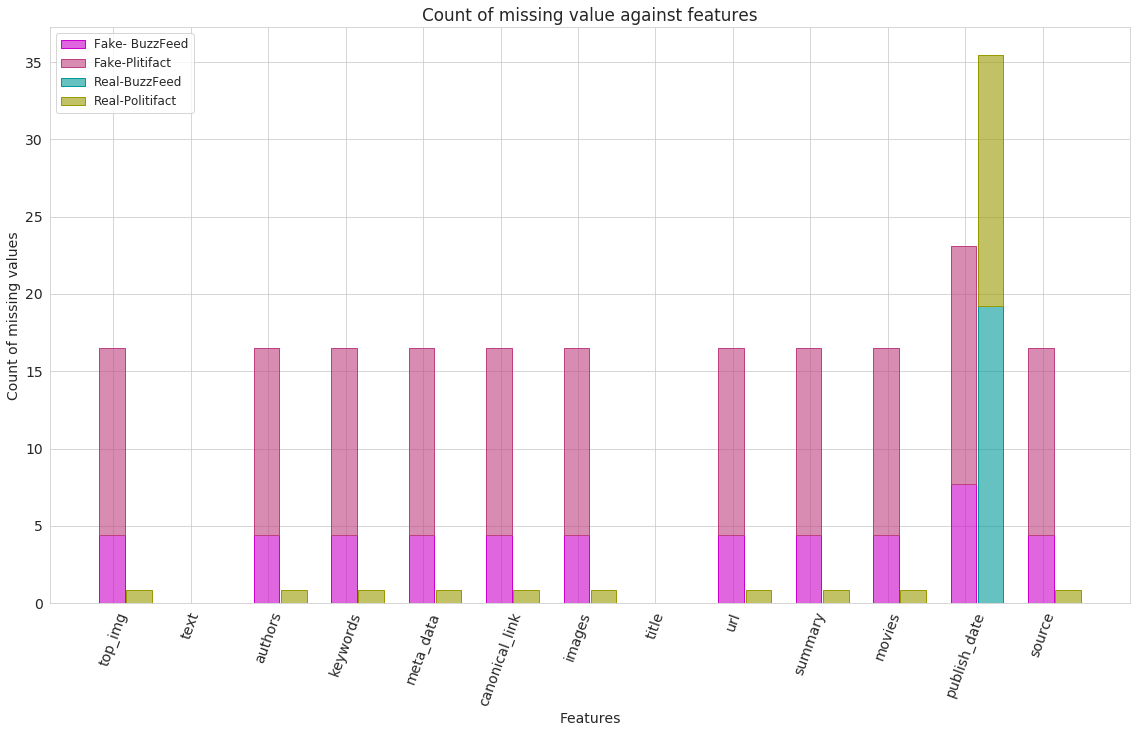

In [26]:
plt.rcParams.update({'font.size': 14})
with sns.axes_style("whitegrid"):
    _cols = ['top_img', 'text', 'authors', 'keywords', 'meta_data',
       'canonical_link', 'images', 'title', 'url', 'summary', 'movies',
       'publish_date', 'source']
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_axes([0,0,1,1])

    _p1 = ax.bar(np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("fake")]["bf"], width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax.bar(np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("fake")]["pf"], width, bottom=df_nan_count_all.set_index(["news_type", "plt"]).T[("fake")]["bf"], color=color_pf_fk_9, edgecolor = color_pf_fk)

    _p3 = ax.bar(0.35 + np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("real")]["bf"], width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax.bar(0.35 + np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("real")]["pf"], width, bottom=df_nan_count_all.set_index(["news_type", "plt"]).T[("real")]["bf"], color=color_pf_real_9, edgecolor = color_pf_real)
    
    xticks(0.02+np.arange(13), _cols, rotation=70)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([_p1, _p2, _p3, _p4], ["Fake- BuzzFeed", "Fake-Plitifact", "Real-BuzzFeed", "Real-Politifact"], loc='upper left', prop={'size':12})
    ax.set_xlabel("Features")
    ax.set_ylabel("Count of missing values")
    ax.set_title ("Count of missing value against features")
    #fig.legend(handles=[_p1,_p2,_p3, _p4])

In [27]:
df_nan_count_all

,news_type,top_img,text,authors,keywords,meta_data,canonical_link,images,title,url,summary,movies,publish_date,source,plt
0,fake,4.395604,0.0,4.395604,4.395604,4.395604,4.395604,4.395604,0.0,4.395604,4.395604,4.395604,7.692308,4.395604,bf
1,real,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,19.230769,0.000000,bf
0,fake,12.083333,0.0,12.083333,12.083333,12.083333,12.083333,12.083333,0.0,12.083333,12.083333,12.083333,15.416667,12.083333,pf
1,real,0.833333,0.0,0.833333,0.833333,0.833333,0.833333,0.833333,0.0,0.833333,0.833333,0.833333,16.250000,0.833333,pf


>  🖊️ Fake news have more missing information of [ top image, authors, keywords, meta_data, cannonical link, images, url, summary, published date and summary]

# Load text meta data

## BuzzFeed

In [28]:
dir_bf_news = dir_buzz_par + "News.txt"
dir_bf_user = dir_buzz_par + "User.txt"
dir_bf_news_user = dir_buzz_par + "BuzzFeedNewsUser.txt"
dir_bf_user_user = dir_buzz_par + "BuzzFeedUserUser.txt"

In [29]:
with open(dir_bf_news, encoding="utf-8") as file:
    #bf_news = [(_indx+1, l.rstrip("\n")) for _indx, l in enumerate(file)]
    bf_news = [(_indx+1, l.rstrip("\n"), l.rstrip("\n").split("_")[0]+"_"+ 
                l.rstrip("\n").split("_")[1]+ "_"+ str(_indx+1)) for _indx, l in enumerate(file)]
    
    
#df_bf_news = pd.DataFrame.from_records(bf_news, columns =['news_num_id', 'news_alph_id'])     
df_bf_news = pd.DataFrame.from_records(bf_news, columns =['news_num_id', 'news_alph_id', 'news_id_real'])     

In [30]:
df_bf_news["news_num_id"] = "bf_n_" + df_bf_news["news_num_id"].astype(str)

In [31]:
df_bf_news.head()

,news_num_id,news_alph_id,news_id_real
0,bf_n_1,BuzzFeed_Real_1,BuzzFeed_Real_1
1,bf_n_2,BuzzFeed_Real_2,BuzzFeed_Real_2
2,bf_n_3,BuzzFeed_Real_3,BuzzFeed_Real_3
3,bf_n_4,BuzzFeed_Real_4,BuzzFeed_Real_4
4,bf_n_5,BuzzFeed_Real_5,BuzzFeed_Real_5


User

### Merge News content with news id

In [40]:
df_bf_news = pd.merge(df_bf_news_cont, df_bf_news, on=["news_alph_id"])

## Politifact

In [41]:
dir_poli_news = dir_politi_par + "News.txt"
dir_poli_user = dir_politi_par + "User.txt"
dir_poli_news_user = dir_politi_par + "PolitiFactNewsUser.txt"
dir_poli_user_user = dir_politi_par + "PolitiFactUserUser.txt"

In [42]:
with open(dir_poli_news, encoding="utf-8") as file:
    poli_news = [(_indx+1, l.rstrip("\n"), l.rstrip("\n").split("_")[0]+"_"+ 
                l.rstrip("\n").split("_")[1]+ "_"+ str(_indx+1)) for _indx, l in enumerate(file)]
    
    df_poli_news = pd.DataFrame.from_records(poli_news, columns=["news_num_id", "news_alph_id", "news_id_real"])    

In [43]:
df_poli_news["news_num_id"] = "pf_n_" + df_poli_news["news_num_id"].astype(str)
df_poli_news

,news_num_id,news_alph_id,news_id_real
0,pf_n_1,PolitiFact_Real_1,PolitiFact_Real_1
1,pf_n_2,PolitiFact_Real_2,PolitiFact_Real_2
2,pf_n_3,PolitiFact_Real_3,PolitiFact_Real_3
3,pf_n_4,PolitiFact_Real_4,PolitiFact_Real_4
4,pf_n_5,PolitiFact_Real_5,PolitiFact_Real_5
...,...,...,...
235,pf_n_236,PolitiFact_Fake_116,PolitiFact_Fake_236
236,pf_n_237,PolitiFact_Fake_117,PolitiFact_Fake_237
237,pf_n_238,PolitiFact_Fake_118,PolitiFact_Fake_238
238,pf_n_239,PolitiFact_Fake_119,PolitiFact_Fake_239


In [52]:
df_poli_news = pd.merge(df_poli_news_cont, df_poli_news, on=["news_alph_id"])

# Merge Buzzfeed and Politifact and news content

In [53]:
df_all_news = pd.concat([df_bf_news, df_poli_news])

In [54]:
df_all_news.reset_index(drop=True, inplace=True)

In [55]:
df_all_news

,news_alph_id,top_img,text,authors,keywords,meta_data,canonical_link,images,title,url,summary,movies,publish_date,source,plt,news_type,news_num_id,news_id_real
0,BuzzFeed_Fake_28,http://eaglerising.com/wp-content/uploads/2016...,A Daisy of a Rerun\n\nI am of an age which inc...,"[View All Posts, Jim Bowman]",[],"{'description': 'Obama stated of Hillary, “She...",http://eaglerising.com/37040/michelle-obama-at...,[http://constitution.com/wp-content/uploads/20...,"“If You Can’t Run Your Own House, You Certainl...",http://eaglerising.com/37040/michelle-obama-at...,,[https://www.youtube.com/embed/uO0R4k1tVMs?fea...,{'$date': 1474874411000},http://eaglerising.com,bf,fake,bf_n_119,BuzzFeed_Fake_119
1,BuzzFeed_Fake_17,http://eaglerising.com/wp-content/uploads/2016...,I can’t wait for “Weekend at Chelsea’s” to hit...,"[View All Posts, Matt Barber]",[],{'description': 'Am I saying there’s no chance...,http://eaglerising.com/36912/is-it-the-beginni...,[http://constitution.com/wp-content/uploads/20...,Is it the Beginning of the End for Hillary Cli...,http://eaglerising.com/36912/is-it-the-beginni...,,[],{'$date': 1474444240000},http://eaglerising.com,bf,fake,bf_n_108,BuzzFeed_Fake_108
2,BuzzFeed_Fake_45,http://freedomdaily.com/wp-content/uploads/201...,131.1k SHARES Facebook Twitter\n\nWell tell us...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/female-muslim-american...,[https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...,Female Muslim-American Olympian Bashes U.S.A. ...,http://freedomdaily.com/female-muslim-american...,,[],{'$date': 1470794442000},http://freedomdaily.com,bf,fake,bf_n_136,BuzzFeed_Fake_136
3,BuzzFeed_Fake_41,http://freedomdaily.com/wp-content/uploads/201...,0 SHARES Facebook Twitter\n\nBernard Sansaricq...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/former-haitian-senate-...,[http://constitution.com/wp-content/uploads/20...,Clinton's Exploited Haiti Earthquake ‘to Steal...,http://freedomdaily.com/former-haitian-senate-...,,[],{'$date': 1474503317000},http://freedomdaily.com,bf,fake,bf_n_132,BuzzFeed_Fake_132
4,BuzzFeed_Fake_46,http://freedomdaily.com/wp-content/uploads/201...,4.3k SHARES Facebook Twitter\n\nCharlotte riot...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/charlotte-thugs-leaves...,[http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...,Charlotte Thugs Leaves Cop’s Body With Disgust...,http://freedomdaily.com/charlotte-thugs-leaves...,,[],{'$date': 1474566193000},http://freedomdaily.com,bf,fake,bf_n_137,BuzzFeed_Fake_137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,PolitiFact_Real_39,http://eaglerising.com/wp-content/uploads/2016...,"Never has the “rights for me, but not for thee...","[Philip Hodges, View All Posts]",[],"{'description': '""I think they should disarm i...",http://eaglerising.com/36873/trump-challenges-...,[http://constitution.com/wp-content/uploads/20...,“See What Happens to Her!” [VIDEO] – Eagle Rising,http://eaglerising.com/36873/trump-challenges-...,,[],{'$date': 1474416747000},http://eaglerising.com,pf,real,pf_n_39,PolitiFact_Real_39
418,PolitiFact_Real_20,http://static.politico.com/c6/cd/2a88f055435fa...,Gov. Chris Christie greets residents at a gath...,[Matt Friedman],[],{'description': '<p>Gov. Chris Christie has th...,http://www.politico.com/states/new-jersey/stor...,[https://static.politico.com/dims4/default/d09...,Christie among the most unpopular governors in...,http://politi.co/2cZxICx,,[],{'$date': 1474369091000},http://politi.co,pf,real,pf_n_20,PolitiFact_Real_20
419,PolitiFact_Real_99,http://a.abcnews.com/images/Politics/AP_donald...,"Donald Trump Jr., a son of the Republican pres...",[Abc News],[],{'fb_title': 'Trump Jr. Compares Syrian Refuge...,http://abcnews.go.com/Politics/donald-trump-jr...,[http://www.googleadservices.com/pagead/conver...,Donald Trump Jr. Compares Syrian Refugees to S...,http://abcn.ws/2cFVuaq,,[],None,http://abcn.ws,p

In [56]:
df_all_news[(df_all_news["news_type"] == "real") & (df_all_news["plt"] == "bf")].shape[0]

91

In [57]:
plt.get_cmap("Pastel1")(np.array([1,3]))

array([[0.70196078, 0.80392157, 0.89019608, 1.        ],
       [0.87058824, 0.79607843, 0.89411765, 1.        ]])

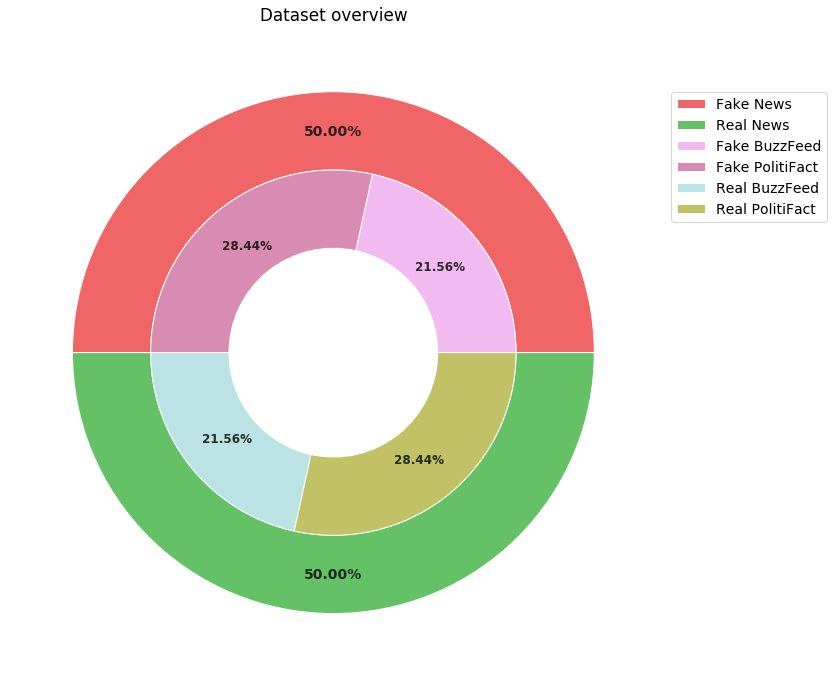

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
size = 0.3
vals = np.array([[df_bf_news[df_bf_news["news_type"] == "fake"].shape[0], 
                df_poli_news[df_poli_news["news_type"] == "fake"].shape[0]],
                [df_bf_news[df_bf_news["news_type"] == "real"].shape[0], 
                df_poli_news[df_poli_news["news_type"] == "real"].shape[0]]])



_, _, autotexts_1 = ax.pie(vals.sum(axis=1), radius=1,\
            colors=[color_fk_9,color_real_9], \
            wedgeprops=dict(width=size, edgecolor='w'),\
           pctdistance=0.85,autopct='%.2f%%')

_, _, autotexts_2 = ax.pie(x=vals.flatten(),radius=1-size,\
       colors=[color_bf_fk_4, color_pf_fk_9, color_bf_real_4, color_pf_real_9], wedgeprops=dict(width=size, edgecolor='w'),\
            pctdistance=0.75, labeldistance=0.4,\
           autopct='%.2f%%',)

handles, labels = ax.get_legend_handles_labels()

          
ax.legend(labels = ["Fake News", "Real News","Fake BuzzFeed", "Fake PolitiFact","Real BuzzFeed", "Real PolitiFact"], 
           bbox_to_anchor=(0.3, 0.3, 1.0, 1.0), loc='right',
           ncol=1,  borderaxespad=2.0, prop={'size': 14})

#ax.set(title="Pie plot with `ax.bar` and polar coordinates")

# Add counts above the two bar graphs
for autotext in autotexts_1:
    autotext.set_color('#111111dd'),
    autotext.set_size(14), 
    autotext.set_weight("bold")

for autotext in autotexts_2:
    autotext.set_color('#111111dd'),
    autotext.set_size(12), 
    autotext.set_weight("bold")
    
    
ax.set(aspect="equal")

ax.set_title("Dataset overview")

plt.show()

# Data Analysis and Feature extraction

## Text

### Sentiment

In [59]:
tqdm_notebook().pandas()

In [60]:
df_news_txt = df_all_news[["news_alph_id", "text", "plt", "news_type"]]

In [62]:
df_news_txt["sentences"] = df_news_txt["text"].progress_map(sent_tokenize)

In [63]:
df_news_txt['tokens_sentences'] = df_news_txt['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])

In [64]:
df_news_txt['POS_tokens'] = df_news_txt['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])

#### Lemitization

In [65]:

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [66]:
# Lemmatizing each word with its POS tag, in each sentence
df_news_txt['tokens_sentences_lemmatized'] = df_news_txt['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

#### Stop Words

In [68]:
stopwords_verbs = []
stopwords_other = ['de', 'en']
my_stopwords = stopwords.words("english") + stopwords_verbs + stopwords_other

In [70]:
df_news_txt['tokens'] = df_news_txt['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df_news_txt['tokens'] = df_news_txt['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

### LDA

bi-grams and tri-grams

In [71]:
tokens = df_news_txt['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [72]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [73]:
from gensim import models
np.random.seed(37)
num_topics = 20
lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

#### LDA exploration

Topics

In [74]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)

0: 0.014*"obama" + 0.007*"also" + 0.007*"country" + 0.006*"us" + 0.006*"get" + 0.005*"make" + 0.005*"know" + 0.005*"would" + 0.005*"president" + 0.005*"white_house" + 0.004*"trump" + 0.004*"like" + 0.004*"go" + 0.004*"right" + 0.004*"clinton" + 0.004*"state" + 0.003*"two" + 0.003*"military" + 0.003*"washington" + 0.003*"tell"
1: 0.014*"go" + 0.011*"people" + 0.009*"vote" + 0.007*"make" + 0.007*"country" + 0.007*"north_korea" + 0.007*"first" + 0.006*"get" + 0.005*"protect" + 0.005*"take" + 0.005*"also" + 0.005*"trump" + 0.005*"want" + 0.004*"us" + 0.004*"well" + 0.004*"think" + 0.004*"end" + 0.004*"hillary" + 0.004*"call" + 0.004*"time"
2: 0.010*"would" + 0.008*"people" + 0.008*"trump" + 0.008*"get" + 0.007*"take" + 0.006*"make" + 0.006*"donald_trump" + 0.006*"anderson" + 0.005*"well" + 0.005*"day" + 0.005*"study" + 0.005*"time" + 0.005*"rest" + 0.005*"work" + 0.005*"call" + 0.004*"test" + 0.004*"buy" + 0.004*"go" + 0.004*"country" + 0.004*"claim"
3: 0.007*"report" + 0.007*"country" + 0

Assigning topic to docs

In [77]:
topics = [lda_model[corpus[i]] for i in range(len(df_news_txt))]

In [78]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [79]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [80]:
df_news_txt

,news_alph_id,text,plt,news_type,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,BuzzFeed_Fake_28,A Daisy of a Rerun\n\nI am of an age which inc...,bf,fake,[A Daisy of a Rerun\n\nI am of an age which in...,"[[A, Daisy, of, a, Rerun, I, am, of, an, age, ...","[[(A, DT), (Daisy, NNP), (of, IN), (a, DT), (R...","[[A, Daisy, of, a, Rerun, I, be, of, an, age, ...","[daisy, rerun, age, include, probably, first, ..."
1,BuzzFeed_Fake_17,I can’t wait for “Weekend at Chelsea’s” to hit...,bf,fake,[I can’t wait for “Weekend at Chelsea’s” to hi...,"[[I, can, ’, t, wait, for, “, Weekend, at, Che...","[[(I, PRP), (can, MD), (’, VB), (t, JJ), (wait...","[[I, can, ’, t, wait, for, “, Weekend, at, Che...","[wait, weekend, chelsea, hit, big, screen, cnn..."
2,BuzzFeed_Fake_45,131.1k SHARES Facebook Twitter\n\nWell tell us...,bf,fake,[131.1k SHARES Facebook Twitter\n\nWell tell u...,"[[131.1k, SHARES, Facebook, Twitter, Well, tel...","[[(131.1k, CD), (SHARES, NNP), (Facebook, NNP)...","[[131.1k, SHARES, Facebook, Twitter, Well, tel...","[shares, facebook, twitter, well, tell, us, re..."
3,BuzzFeed_Fake_41,0 SHARES Facebook Twitter\n\nBernard Sansaricq...,bf,fake,[0 SHARES Facebook Twitter\n\nBernard Sansaric...,"[[0, SHARES, Facebook, Twitter, Bernard, Sansa...","[[(0, CD), (SHARES, NNP), (Facebook, NNP), (Tw...","[[0, SHARES, Facebook, Twitter, Bernard, Sansa...","[shares, facebook, twitter, bernard, sansaricq..."
4,BuzzFeed_Fake_46,4.3k SHARES Facebook Twitter\n\nCharlotte riot...,bf,fake,[4.3k SHARES Facebook Twitter\n\nCharlotte rio...,"[[4.3k, SHARES, Facebook, Twitter, Charlotte, ...","[[(4.3k, CD), (SHARES, NNP), (Facebook, NNP), ...","[[4.3k, SHARES, Facebook, Twitter, Charlotte, ...","[shares, facebook, twitter, charlotte, riot, g..."
...,...,...,...,...,...,...,...,...,...
417,PolitiFact_Real_39,"Never has the “rights for me, but not for thee...",pf,real,"[Never has the “rights for me, but not for the...","[[Never, has, the, “, rights, for, me, ,, but,...","[[(Never, RB), (has, VBZ), (the, DT), (“, NNP)...","[[Never, have, the, “, right, for, me, ,, but,...","[never, right, thee, idea, apparent, context, ..."
418,PolitiFact_Real_20,Gov. Chris Christie greets residents at a gath...,pf,real,"[Gov., Chris Christie greets residents at a ga...","[[Gov, .], [Chris, Christie, greets, residents...","[[(Gov, NNP), (., .)], [(Chris, NNP), (Christi...","[[Gov, .], [Chris, Christie, greet, resident, ...","[gov, chris, christie, greet, resident, gather..."
419,PolitiFact_Real_99,"Donald Trump Jr., a son of the Republican pres...",pf,real,"[Donald Trump Jr., a son of the Republican pre...","[[Donald, Trump, Jr., ,, a, son, of, the, Repu...","[[(Donald, NNP), (Trump, NNP), (Jr., NNP), (,,...","[[Donald, Trump, Jr., ,, a, son, of, the, Repu...","[donald, trump, son, republican, presidential,..."
420,PolitiFact_Real_30,As Donald Trump courted African-American voter...,pf,real,[As Donald Trump courted African-American vote...,"[[As, Donald, Trump, courted, African-American...","[[(As, IN), (Donald, NNP), (Trump, NNP), (cour...","[[As, Donald, Trump, court, African-American, ...","[donald, trump, court, voter, cleveland, wedne..."


In [81]:
pd.merge(df_news_txt["news_alph_id"], document_topic, left_index=True, right_index=True).to_csv("topic.csv", index = False)

In [82]:
document_topic.sort_values(2, ascending=False)[2].head(20)

289    0.999149
337    0.998843
146    0.998445
222    0.998159
253    0.998122
232    0.997660
62     0.894584
226    0.606348
296    0.483567
271    0.448200
89     0.373290
357    0.246577
141    0.221725
251    0.059419
238    0.050000
37     0.050000
292    0.050000
63     0.050000
221    0.048394
43     0.028015
Name: 2, dtype: float64

Text(0.5, 1, 'News vs Topic weight')

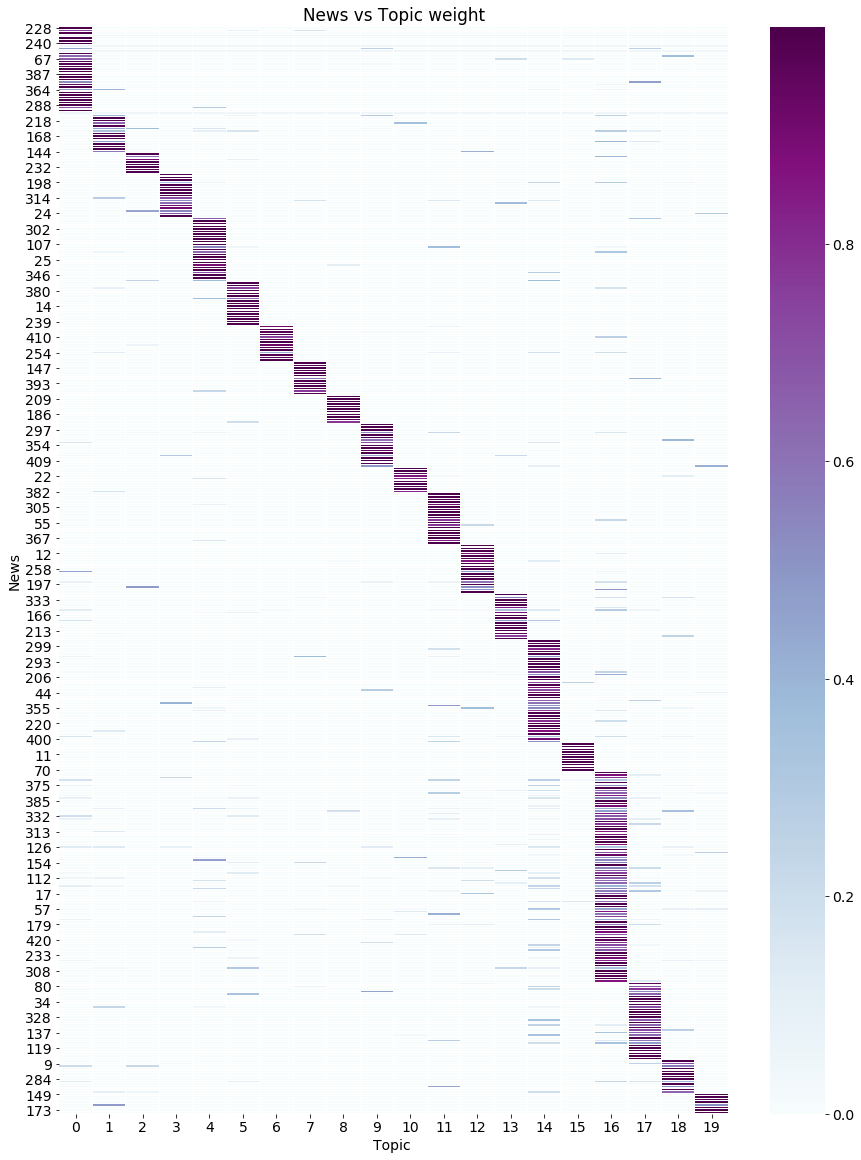

In [83]:
plt.figure(figsize=(15, 20))
ax = sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index], cmap="BuPu", linewidth=.1,cbar_kws={"shrink": 1})
ax.set_xlabel("Topic ")
ax.set_ylabel("News")
ax.set_title("News vs Topic weight")

In [84]:
df_all_news.columns

Index(['news_alph_id', 'top_img', 'text', 'authors', 'keywords', 'meta_data',
       'canonical_link', 'images', 'title', 'url', 'summary', 'movies',
       'publish_date', 'source', 'plt', 'news_type', 'news_num_id',
       'news_id_real'],
      dtype='object')

In [85]:
df_emotion_lbl = pd.merge(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index], df_all_news[["news_id_real", "news_type"]], left_index=True, right_index=True)

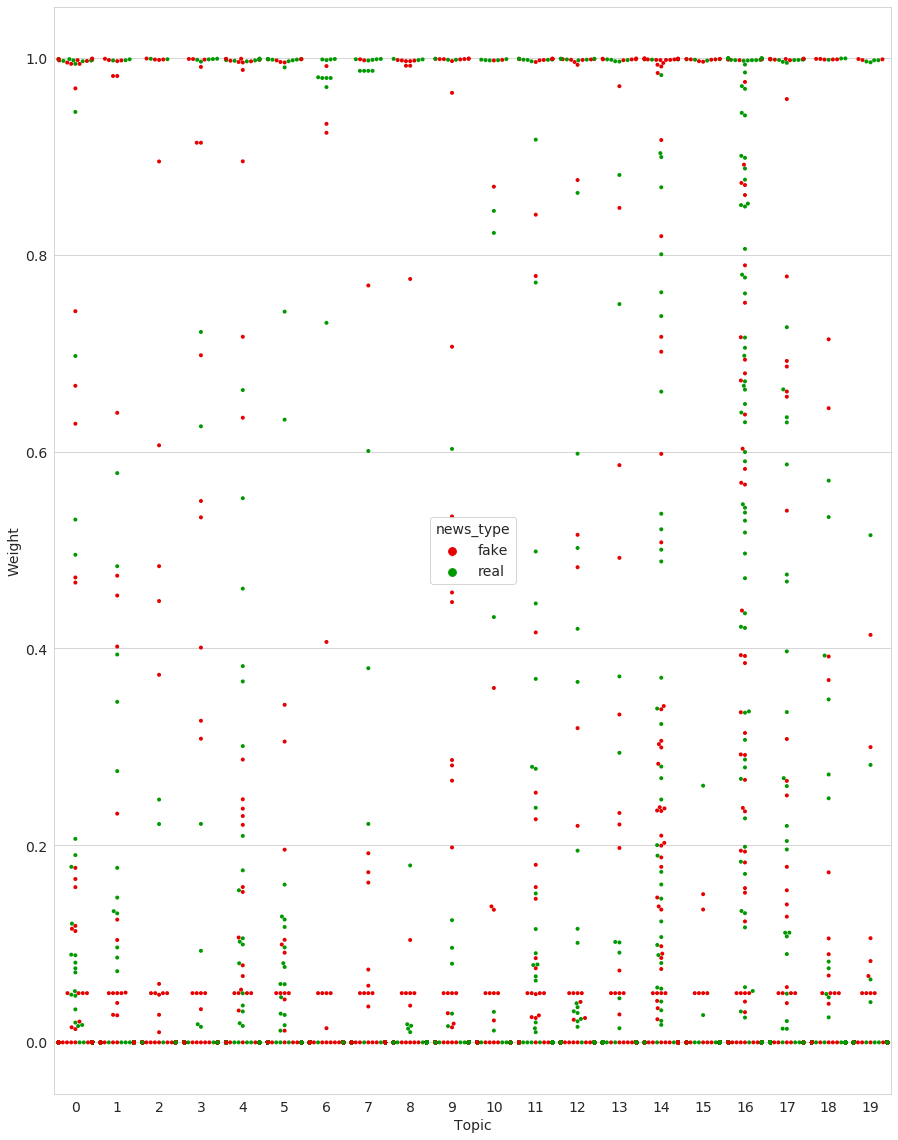

In [86]:
with sns.axes_style("whitegrid"):  
    plt.figure(figsize=(15, 20))
    sns.swarmplot(data=df_emotion_lbl.melt(['news_id_real', 'news_type'], var_name='Topic',  value_name='Weight'), 
                  x = "Topic", y="Weight", hue = "news_type", palette = sns.color_palette([color_fk_4, color_real_4]),  size=4)

In [87]:
df_emotion_lbl.melt(['news_id_real', 'news_type'], var_name='Topic',  value_name='Weight')

,news_id_real,news_type,Topic,Weight
0,PolitiFact_Fake_229,fake,0,0.997172
1,PolitiFact_Fake_163,fake,0,0.742516
2,BuzzFeed_Fake_98,fake,0,0.993708
3,BuzzFeed_Fake_104,fake,0,0.050000
4,PolitiFact_Real_50,real,0,0.997129
...,...,...,...,...
8435,BuzzFeed_Fake_171,fake,19,0.997570
8436,PolitiFact_Real_40,real,19,0.515056
8437,BuzzFeed_Real_45,real,19,0.995273
8438,BuzzFeed_Real_41,real,19,0.997331


In [88]:
document_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.015262,0.0,0.025667,0.00000,0.00000,0.085736,0.0,0.872801,0.000000,0.0,0.0
1,0.113056,0.040023,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.037327,0.000000,0.0,0.000000,0.00000,0.00000,0.237631,0.0,0.393251,0.178275,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.998176,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.99766,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.220901,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.209955,0.0,0.568303,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.998260,0.0,0.0
418,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.99821,0.000000,0.0,0.000000,0.000000,0.0,0.0
419,0.697012,0.000000,0.0,0.0,0.300899,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0
420,0.000000,0.000000,0.0,0.0,0.000000,0.027844,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.971091,0.000000,0.0,0.0


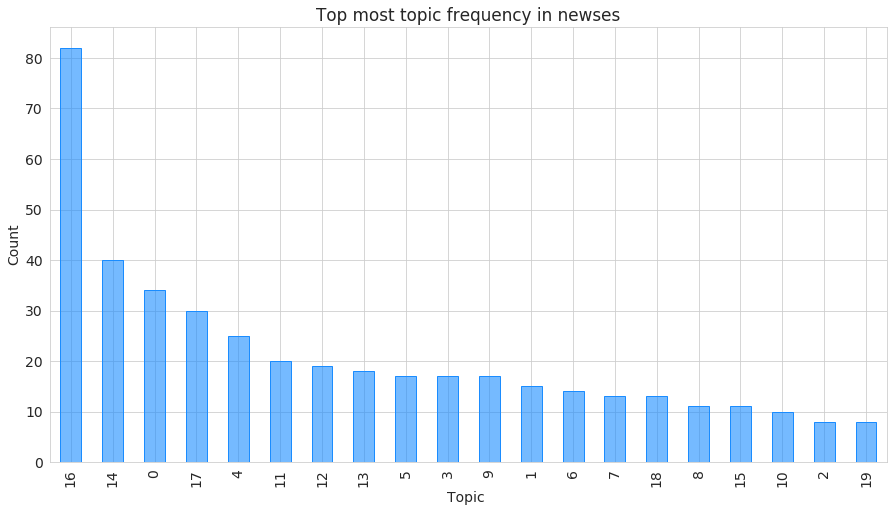

In [89]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News Authors")
    ax1 = document_topic.idxmax(axis=1).value_counts().plot.bar(color=color_pf_9,edgecolor = color_pf)
    ax1.set_xlabel("Topic ")
    ax1.set_ylabel("Count")
    ax1.set_title("Top most topic frequency in newses")

In [90]:
document_topic.idxmax(axis=1)

0      16
1      16
2       9
3      12
4      16
       ..
417    17
418    13
419     0
420    16
421     7
Length: 422, dtype: int64

In [91]:
## topic vs words
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

### Emotion

In [93]:
def text_emotion(df, column):
    new_df = df.copy()

    filepath = ("/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/fake_new_detection/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")
    emolex_df = pd.read_csv(filepath, names=["word", "emotion", "association"],sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

   
    #with tqdm(total=len(list(new_df.iterrows()))) as pbar:
    for i, row in tqdm_notebook(new_df.iterrows(), total= new_df.shape[0]):
        document = new_df.loc[i][column]
        #print(document)
        for word in tqdm_notebook(document):
            word = stemmer.stem(word.lower())
            emo_score = emolex_words[emolex_words.word == word]
            if not emo_score.empty:
                for emotion in list(emotions):
                    emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [94]:
df_emotion = text_emotion(df_news_txt, "tokens")

In [95]:
df_emotion

,news_alph_id,text,plt,news_type,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,BuzzFeed_Fake_28,A Daisy of a Rerun\n\nI am of an age which inc...,bf,fake,[A Daisy of a Rerun\n\nI am of an age which in...,"[[A, Daisy, of, a, Rerun, I, am, of, an, age, ...","[[(A, DT), (Daisy, NNP), (of, IN), (a, DT), (R...","[[A, Daisy, of, a, Rerun, I, be, of, an, age, ...","[daisy, rerun, age, include, probably, first, ...",7,16,8,7,7,17,40,8,12,24
1,BuzzFeed_Fake_17,I can’t wait for “Weekend at Chelsea’s” to hit...,bf,fake,[I can’t wait for “Weekend at Chelsea’s” to hi...,"[[I, can, ’, t, wait, for, “, Weekend, at, Che...","[[(I, PRP), (can, MD), (’, VB), (t, JJ), (wait...","[[I, can, ’, t, wait, for, “, Weekend, at, Che...","[wait, weekend, chelsea, hit, big, screen, cnn...",13,16,15,18,10,43,33,17,6,31
2,BuzzFeed_Fake_45,131.1k SHARES Facebook Twitter\n\nWell tell us...,bf,fake,[131.1k SHARES Facebook Twitter\n\nWell tell u...,"[[131.1k, SHARES, Facebook, Twitter, Well, tel...","[[(131.1k, CD), (SHARES, NNP), (Facebook, NNP)...","[[131.1k, SHARES, Facebook, Twitter, Well, tel...","[shares, facebook, twitter, well, tell, us, re...",6,5,2,7,3,9,4,4,4,6
3,BuzzFeed_Fake_41,0 SHARES Facebook Twitter\n\nBernard Sansaricq...,bf,fake,[0 SHARES Facebook Twitter\n\nBernard Sansaric...,"[[0, SHARES, Facebook, Twitter, Bernard, Sansa...","[[(0, CD), (SHARES, NNP), (Facebook, NNP), (Tw...","[[0, SHARES, Facebook, Twitter, Bernard, Sansa...","[shares, facebook, twitter, bernard, sansaricq...",4,5,2,2,4,9,12,2,3,11
4,BuzzFeed_Fake_46,4.3k SHARES Facebook Twitter\n\nCharlotte riot...,bf,fake,[4.3k SHARES Facebook Twitter\n\nCharlotte rio...,"[[4.3k, SHARES, Facebook, Twitter, Charlotte, ...","[[(4.3k, CD), (SHARES, NNP), (Facebook, NNP), ...","[[4.3k, SHARES, Facebook, Twitter, Charlotte, ...","[shares, facebook, twitter, charlotte, riot, g...",37,16,24,50,11,66,19,31,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,PolitiFact_Real_39,"Never has the “rights for me, but not for thee...",pf,real,"[Never has the “rights for me, but not for the...","[[Never, has, the, “, rights, for, me, ,, but,...","[[(Never, RB), (has, VBZ), (the, DT), (“, NNP)...","[[Never, have, the, “, right, for, me, ,, but,...","[never, right, thee, idea, apparent, context, ...",17,8,1,20,5,23,19,8,1,8
418,PolitiFact_Real_20,Gov. Chris Christie greets residents at a gath...,pf,real,"[Gov., Chris Christie greets residents at a ga...","[[Gov, .], [Chris, Christie, greets, residents...","[[(Gov, NNP), (., .)], [(Chris, NNP), (Christi...","[[Gov, .], [Chris, Christie, greet, resident, ...","[gov, chris, christie, greet, resident, gather...",2,8,3,2,2,6,10,7,1,22
419,PolitiFact_Real_99,"Donald Trump Jr., a son of the Republican pres...",pf,real,"[Donald Trump Jr., a son of the Republican pre...","[[Donald, Trump, Jr., ,, a, son, of, the, Repu...","[[(Donald, NNP), (Trump, NNP), (Jr., NNP), (,,...","[[Donald, Trump, Jr., ,, a, son, of, the, Repu...","[donald, trump, son, republican, presidential,...",1,2,1,4,1,10,5,4,5,6
420,PolitiFact_Real_30,As Donald Trump courted African-American voter...,pf,real,[As Donald Trump courted African-American vote...,"[[As, Donald, Trump, courted, African-American...","[[(As, IN), (Donald, NNP), (Trump, NNP), (cour...","[[As, Donald, Trump, court, African-American, ...","[donald, trump, court, voter, cleveland, wedne...",6,8,3,6,4,15,14,6,13,12


In [96]:
def count_tkn(token):
    return len(token)
df_emotion["count_token"] =  df_emotion["tokens"].apply(count_tkn)

In [97]:
for _col in ['anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']:
    df_emotion[_col] = df_emotion[_col] / df_emotion["count_token"]

In [98]:
df_emotion[df_emotion[['news_alph_id', 'anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']].isnull().any(axis=1)]

,news_alph_id,text,plt,news_type,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,count_token
238,PolitiFact_Fake_24,,pf,fake,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
292,PolitiFact_Fake_47,,pf,fake,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [99]:
df_all_news["text"][292]

''

In [100]:
df_emotion[['news_alph_id', 'count_at', 'anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']].to_csv("emotion.csv", index=False)

KeyError: "['count_at'] not in index"

In [ ]:
sns.heatmap(df_emotion[['anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']]*100, cmap="BuPu")

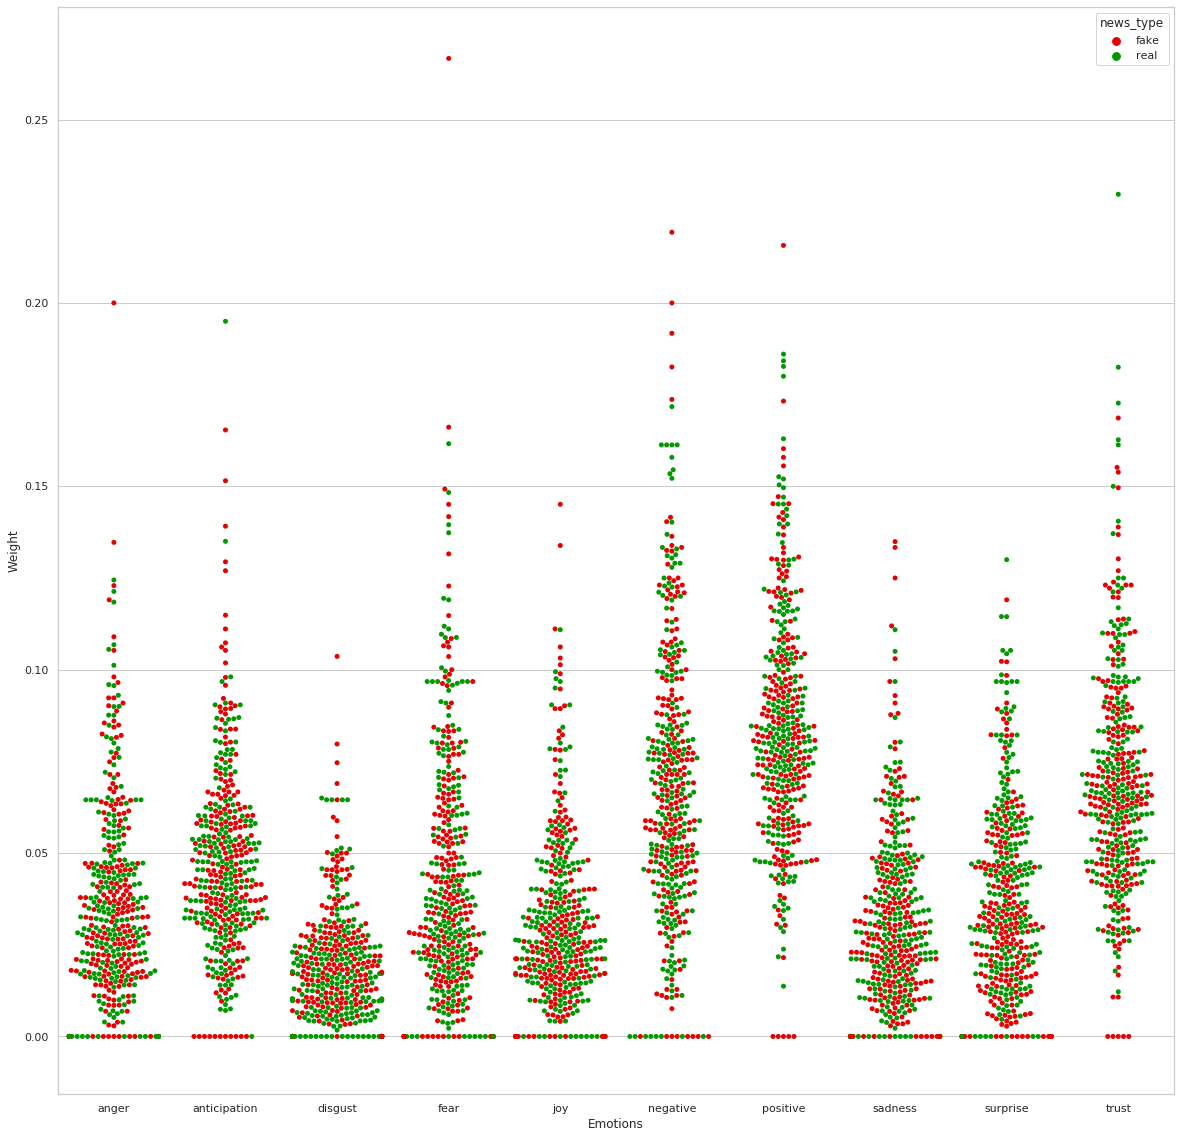

In [187]:
with sns.axes_style("whitegrid"):  
    sns.swarmplot(data=df_emotion[['news_alph_id','anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust', 'news_type']]\
                  .melt(['news_alph_id', 'news_type'], var_name='Emotions',  value_name='Weight'), 
                  x = "Emotions", y="Weight", hue = "news_type", palette = sns.color_palette([color_fk_4, color_real_4]))